<a href="https://colab.research.google.com/github/jkauf8/liver_segmentation/blob/main/Deep_Learning_Liver_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
!{sys.executable} -m pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.5 MB/s eta 0:00:00


In [2]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
from keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import nibabel as nib
import re
import pydicom as dicom

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read in liver masks

In [229]:
directory = '/content/drive/My Drive/Radiology Research/masks'
masks=[]
for filename in sorted(os.listdir(directory)):
  for files in sorted((os.listdir(os.path.join(directory, filename)))):
    file=os.path.join(directory, filename, files)
    image=nib.load(file).get_fdata()
    scaled_image = np.rot90(np.fliplr(np.uint8(image)))
    masks.append(scaled_image)

In [230]:
print(len(masks))
print(masks[1].shape)
print(len(masks[1]))

42
(176, 256, 120)
176


Read in dicom images

In [255]:
images=[]
final_images=[]
directory2 = '/content/drive/My Drive/Radiology Research/images'
for filename in sorted(os.listdir(directory2)):
  for files in sorted(int(i) for i in (os.listdir(os.path.join(directory2, filename)))):
    for image in sorted(os.listdir(os.path.join(directory2,filename,str(files))),reverse=True):
      if image.endswith('.dcm'):
          ds = dicom.dcmread(os.path.join(directory2, filename, str(files), image))
          image=ds.pixel_array.astype(float)
          scaled_image = (np.maximum(image, 0) / image.max()) * 255.0
          scaled_image = np.uint8(scaled_image)
          #final_image = Image.fromarray(scaled_image)
          images.append(scaled_image)
    final_images.append(images)
    images=[]

In [256]:
len(final_images)

42

In [257]:
final_images[1][1].shape

(176, 256)

In [258]:
len(final_images[0])

120

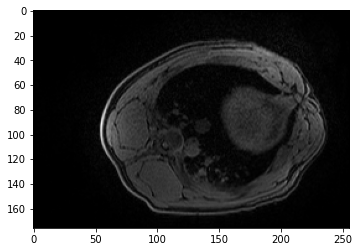

In [263]:
test = final_images[0][100] #second index is slice number 
plt.imshow(test, cmap="gray")
plt.show()

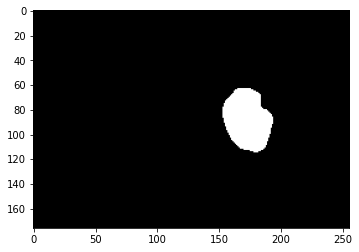

In [264]:
test = masks[0][:,:,100]
plt.imshow(test, cmap="gray")
plt.show()